### 1. Describe KNN in your own words

#### KNN algorithm is a supervised machine learning algorithm used for classification and regression problems. KNN mainly works on assumption that neighboring points are of similar in nature. It is very simple algorithm and is very easy to implement. It is versatile and does not involve any assumptions. Cons of this algorithm is that computational time increases with larger dataset. Fixing of proper value of k is also challenging.

#### KNN uses eclidean formulae to calcuate distance between 2 points in the 2D space. Similarly it uses manhatten distance, cosine similarity to calculated distance between points in muti-dimentional space. Using these methods distance from a chosen point to all the points in the dataset will be calculated. KNN can only be performed on numerical data and single column which is independent vairble that can be qualitative is used for calculation. 

#### If the value of k is high means data has high variance which means solution is extremely soothing, which leads to over fitting. Where as smaller k values implies for low variance which leads to under fitting. Hence value of k should be choosen wisely.

### 2.Using the KNN example from class, write a function that finds the optimal value for k. You should iterate over a range of values and return the k and the score when the accuracy score is maximized.


In [144]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [145]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [146]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

#split data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

#standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)
print(y_predicted)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 1 0]


In [147]:
# creating a list of knn values for different value of k.

klist=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_predicted = knn.predict(X_test)
    klist.append(knn.score(X_test, y_test))

#### Considering a range of 1 to 100 to get the sense on how k behaves.

In [148]:
print(klist)

[0.6953125, 0.7057291666666666, 0.7369791666666666, 0.7109375, 0.7421875, 0.7291666666666666, 0.7135416666666666, 0.7135416666666666, 0.7213541666666666, 0.7161458333333334, 0.7265625, 0.703125, 0.7083333333333334, 0.7057291666666666, 0.7161458333333334, 0.7135416666666666, 0.7239583333333334, 0.7135416666666666, 0.7213541666666666, 0.7161458333333334, 0.7265625, 0.7317708333333334, 0.7265625, 0.7265625, 0.7239583333333334, 0.7265625, 0.7369791666666666, 0.7291666666666666, 0.734375, 0.734375, 0.7395833333333334, 0.7395833333333334, 0.7447916666666666, 0.7265625, 0.7421875, 0.7317708333333334, 0.7317708333333334, 0.7291666666666666, 0.7213541666666666, 0.7213541666666666, 0.7135416666666666, 0.71875, 0.7161458333333334, 0.7135416666666666, 0.7161458333333334, 0.7161458333333334, 0.7265625, 0.7265625, 0.7213541666666666, 0.7239583333333334, 0.7239583333333334, 0.7213541666666666, 0.71875, 0.7109375, 0.7161458333333334, 0.7135416666666666, 0.7239583333333334, 0.7161458333333334, 0.726562

In [149]:
# getting the index position for the max value of the list
np.argmax(klist)


# max value from the list which signifies that the 
max(klist)

0.7447916666666666

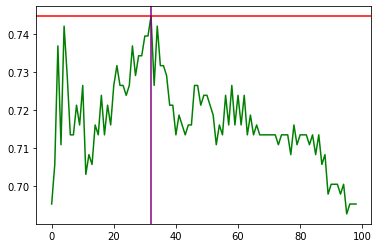

In [151]:
# plot for the klist values:

import matplotlib.pyplot as plt
plt.plot(klist,color='g')

# Horizontal and vertical lines are used to represent  x and y point of highest peak
plt.axhline(max(klist),color='r')
plt.axvline(np.argmax(klist),color='purple')

#### K =33 will give optimum results.